In [ ]:
# Load Titanic Dataset
import pandas as pd
titanic_df = pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Step 2: Find columns with Null values
null_columns = titanic_df.columns[titanic_df.isnull().any()]
print("Columns with missing values:", null_columns)


Columns with missing values: Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [ ]:
# Step 3: Fill missing values
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna("Unknown", inplace=True)
# Fill missing 'Cabin' values with 'Unknown'
titanic_df['Cabin'].fillna('Unknown')

<ipython-input-4-efe3f7dd0632>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


,Cabin
0,Unknown
1,C85
2,Unknown
3,C123
4,Unknown
...,...
886,Unknown
887,B42
888,Unknown
889,C148


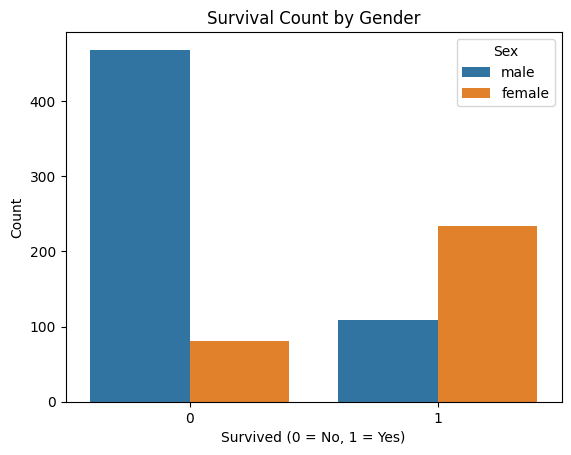

In [ ]:
# Step 4: Bar plot for survival by gender
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=titanic_df, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

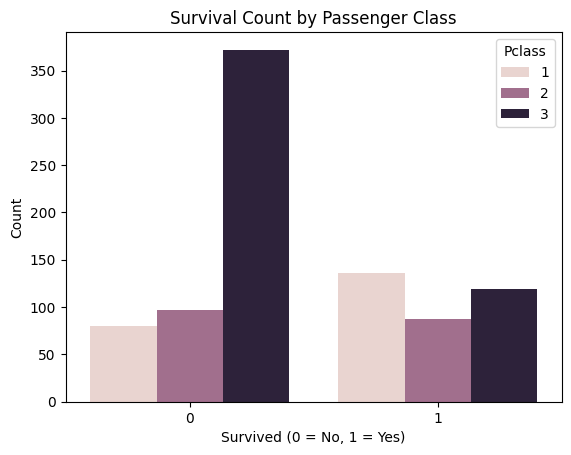

In [ ]:
# Step 5: Survival count by Passenger Class (Pclass)
sns.countplot(data=titanic_df, x='Survived', hue='Pclass')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [ ]:
# Step 6: Create 'AgeClass' column
def classify_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

titanic_df['AgeClass'] = titanic_df['Age'].apply(classify_age)


In [ ]:
# Step 7: Drop 'Age' column
titanic_df.drop(columns=['Age'], inplace=True)


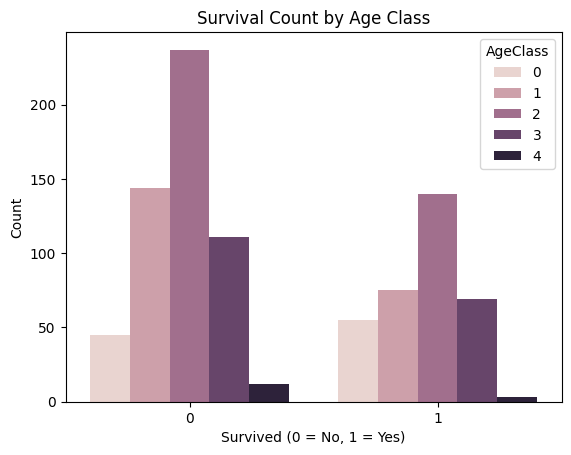

In [ ]:
# Step 8: Survival count by AgeClass
sns.countplot(data=titanic_df, x='Survived', hue='AgeClass')
plt.title("Survival Count by Age Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
